<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключим-нужные-библиотеки" data-toc-modified-id="Подключим-нужные-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключим нужные библиотеки</a></span></li><li><span><a href="#Загрузим-данные,-индексом-будет-признак-времени" data-toc-modified-id="Загрузим-данные,-индексом-будет-признак-времени-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузим данные, индексом будет признак времени</a></span></li><li><span><a href="#Ресемплируем---1H-(сумма-вызовов-за-час)" data-toc-modified-id="Ресемплируем---1H-(сумма-вызовов-за-час)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ресемплируем - 1H (сумма вызовов за час)</a></span></li><li><span><a href="#Создадим-временные-признаки-(отстающие-признаки-и-скользящее-среднее)" data-toc-modified-id="Создадим-временные-признаки-(отстающие-признаки-и-скользящее-среднее)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Создадим временные признаки (отстающие признаки и скользящее среднее)</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-временого-ряда" data-toc-modified-id="Анализ-временого-ряда-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ временого ряда</a></span></li><li><span><a href="#Анализ-num_orders" data-toc-modified-id="Анализ-num_orders-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ <code>num_orders</code></a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подберём-параметры-через-GridSearchCV-и-make_scorer-(RMSE)-для-модели-RandomForestRegressor" data-toc-modified-id="Подберём-параметры-через-GridSearchCV-и-make_scorer-(RMSE)-для-модели-RandomForestRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подберём параметры через GridSearchCV и make_scorer (RMSE) для модели RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Проверка-на-адекватность-по-смещению" data-toc-modified-id="Проверка-на-адекватность-по-смещению-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверка на адекватность по смещению</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогноз заказов такси

Задача: по историческим данным о заказах такси в аэропортах требуется спрогнозировать количество заказов на текущий час (построить модель машинного обучения, строющую прогнозы на временных рядах).

## Подготовка

### Подключим нужные библиотеки

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

pd.options.display.float_format = '{:.04f}'.format

### Загрузим данные, индексом будет признак времени

In [2]:
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


### Ресемплируем - 1H (сумма вызовов за час)

In [3]:
df = df.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, ресемплинг был сделан верно.
</div>

### Создадим временные признаки (отстающие признаки и скользящее среднее)

In [4]:
def make_features(db, max_lag, rolling_mean_size):
    data = db.copy()
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

    return data

data = make_features(df, 3, 3)
data

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,rolling_mean
datetime,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0000,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0000,124.0000,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0000,85.0000,124.0000,93.3333
2018-03-01 04:00:00,43,3,1,3,66.0000,71.0000,85.0000,74.0000
...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,207.0000,217.0000,197.0000,207.0000
2018-08-31 20:00:00,154,8,31,4,136.0000,207.0000,217.0000,186.6667
2018-08-31 21:00:00,159,8,31,4,154.0000,136.0000,207.0000,165.6667


## Анализ

### Анализ временого ряда

In [5]:
print('Начальное время', df.index.min())
print('Конечное время', df.index.max())
print('Всего часов', (df.index.max() - df.index.min()).total_seconds()/3600)
print('Всего объектов', len(df))

Начальное время 2018-03-01 00:00:00
Конечное время 2018-08-31 23:00:00
Всего часов 4415.0
Всего объектов 4416


По времени у нас 6 месяцев - с марта 2018 года до конец августа 2018 года. Количество часов совпадает с количеством объектов датафрейма. 

### Анализ `num_orders`

In [6]:
# проверка на пропуски
df.num_orders.isna().sum()

0

In [7]:
# сколько всего уникальных значений
df.num_orders.nunique()

251

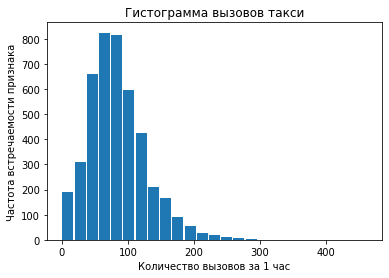

In [8]:
# каких значений больше
params = {
    'bins':25,
    'rwidth':0.9,
    'grid':False
}

df['num_orders'].hist(**params)
plt.title('Гистограмма вызовов такси')
plt.xlabel('Количество вызовов за 1 час')
plt.ylabel('Частота встречаемости признака')
plt.show()

Данные смещены вправо, больше всего значений в районе 100. Чаще всего случается от 70 до 100 вызовов в час.

In [10]:
# добавим в данные скользящее среднее, окно - 6 часов
df['roling_maen'] = df['num_orders'].rolling(6).mean()

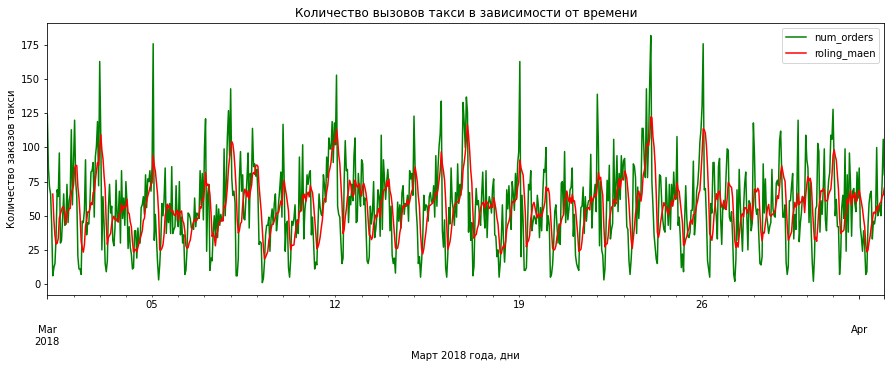

In [11]:
# посмотрим на динамику значений за месяц
params = {
    'figsize':(15,5), 
    'color':['green', 'red'],
}
df['2018-3-1':'2018-4-1'][['num_orders','roling_maen']].plot(**params)
plt.title('Количество вызовов такси в зависимости от времени')
plt.xlabel('Март 2018 года, дни')
plt.ylabel('Количество заказов такси')
plt.show()

На этом графике мы видм периодичность изменения значений

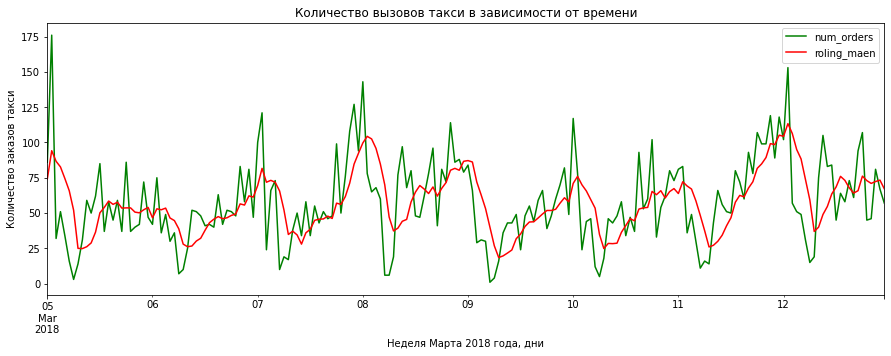

In [12]:
# динамика значений за неледю - с понедельника по воскресенье
params = {
    'figsize':(15,5),
    'color':['green', 'red']
}
df['2018-3-5':'2018-3-12'][['num_orders','roling_maen']].plot(**params)
plt.title('Количество вызовов такси в зависимости от времени')
plt.xlabel('Неделя Марта 2018 года, дни')
plt.ylabel('Количество заказов такси')
plt.show()

7 пиков за неделю, ежедневно количество заказов такси нарастает с утра и достигает максимум к вечеру-ночи, затем резко снижается

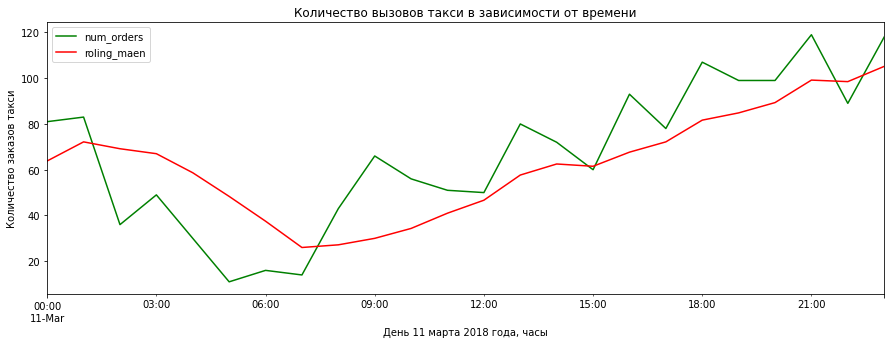

In [13]:
# динамика значений за один день (произвольный - вторник)
df['2018-3-11':'2018-3-11'][['num_orders','roling_maen']].plot(figsize=(15,5), color=['green', 'red'])
plt.title('Количество вызовов такси в зависимости от времени')
plt.xlabel('День 11 марта 2018 года, часы')
plt.ylabel('Количество заказов такси')
plt.show()

Ночью много, к 6 утра снижается, а после идет вверх

In [14]:
decomposed = seasonal_decompose(df['num_orders']) 

Посмотрим тренд и остаток декомпозиции (сезонность оценить невозможно из-за диапазона времени менее года)

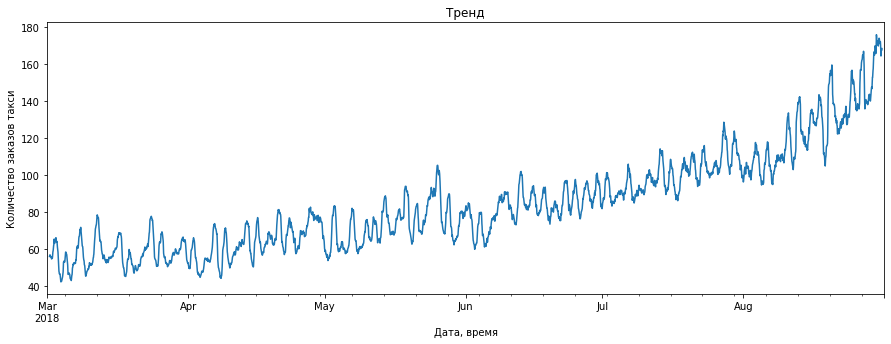

In [15]:
decomposed.trend.plot(ax=plt.gca(), figsize=(15,5))
plt.title('Тренд')
plt.xlabel('Дата, время')
plt.ylabel('Количество заказов такси')
plt.show()

Отмечается восходящий тренд от марта к августу. Процесс - нестационарный.

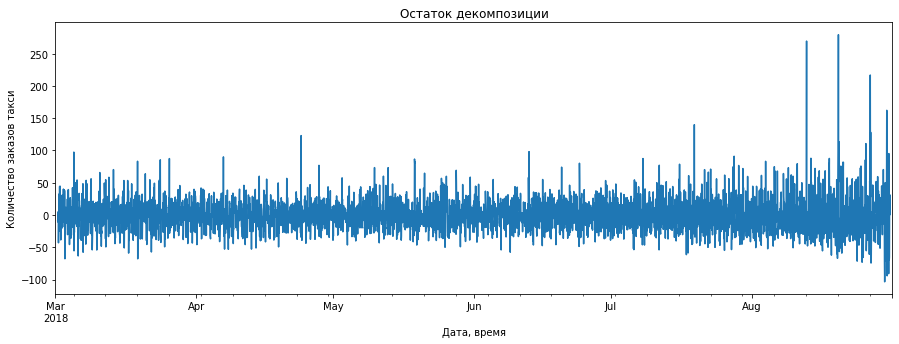

In [16]:
decomposed.resid.plot(ax=plt.gca(), figsize=(15,5))
plt.title('Остаток декомпозиции')
plt.xlabel('Дата, время')
plt.ylabel('Количество заказов такси')
plt.show()

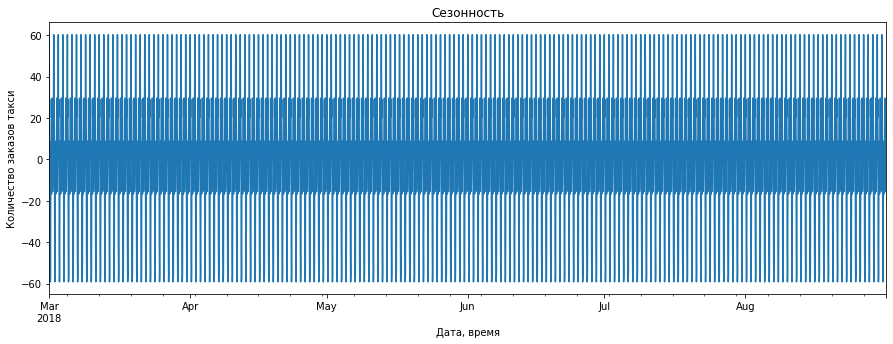

In [17]:
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15,5))
plt.title('Сезонность')
plt.xlabel('Дата, время')
plt.ylabel('Количество заказов такси')
plt.show()

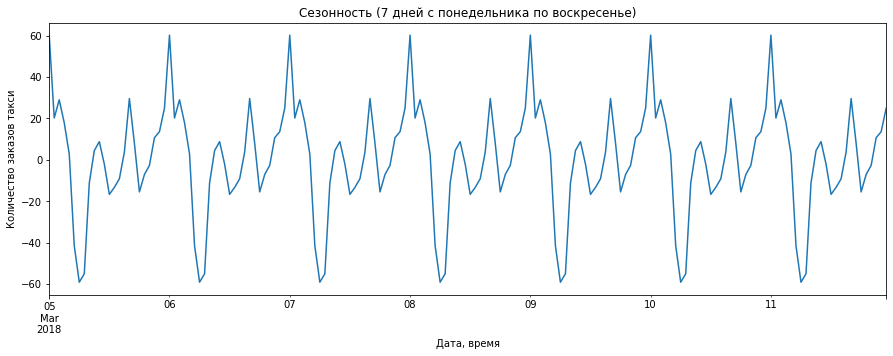

In [18]:
decomposed.seasonal['2018-03-05':'2018-03-11'].plot(ax=plt.gca(), figsize=(15,5))
plt.title('Сезонность (7 дней с понедельника по воскресенье)')
plt.xlabel('Дата, время')
plt.ylabel('Количество заказов такси')
plt.show()

## Обучение

In [19]:
df = df.drop('roling_maen', axis=1)

In [20]:
data = make_features(df, 100, 100)

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=12345),
    RandomForestRegressor(random_state=12345),
    LGBMRegressor(verbose=0, random_state=12345),
    CatBoostRegressor(verbose=0, random_state=12345)
         ]

train, valid_test = train_test_split(data, shuffle=False, test_size=0.3, random_state=12345)

train = train.dropna(axis=0)

valid, test = train_test_split(valid_test, shuffle=False, test_size=0.33, random_state=12345)

print('Размер тренировочной выборки {:.0%}'.format(len(train)/len(df)))
print('Размер валидационной выборки {:.0%}'.format(len(valid)/len(df)))
print('Размер тестовой выборки      {:.0%}'.format(len(test)/len(df)))
print()

x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

x_valid = valid.drop('num_orders', axis=1)
y_valid = valid['num_orders']

x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

dic = {}

for model in models:
    m = model
    m.fit(x_train, y_train)
    predict = m.predict(x_valid)
    rmse = mean_squared_error(y_valid, predict) ** 0.5
    dic[m.__class__.__name__] = rmse

table = pd.DataFrame(data=dic.values(), index=dic.keys(), columns=['RMSE'])
table

Размер тренировочной выборки 68%
Размер валидационной выборки 20%
Размер тестовой выборки      10%

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


,RMSE
LinearRegression,29.0216
DecisionTreeRegressor,40.1761
RandomForestRegressor,30.4186
LGBMRegressor,29.9182
CatBoostRegressor,29.9885


**Вывод:** при стандартных настройках модель линейной регрессии показала лучший результат, который уже меньше 48, остановимся на ней. 

Посмотрим какой результат у модели LinearRegression будет на тесте

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE test {:.2f}'.format(rmse))

RMSE test 44.99


### Подберём параметры через GridSearchCV и make_scorer (RMSE) для модели RandomForestRegressor

In [22]:
data = make_features(df, 100, 100)

def f_rmse(true, pred):
    return mean_squared_error(true,pred) ** .5

scorer = make_scorer(f_rmse, greater_is_better=False)

train, valid_test = train_test_split(data, shuffle=False, test_size=0.3, random_state=12345)
train = train.dropna(axis=0)
valid, test = train_test_split(valid_test, shuffle=False, test_size=0.33, random_state=12345)

x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

x_valid = valid.drop('num_orders', axis=1)
y_valid = valid['num_orders']

x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

tscv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=1000,
    test_size=100
)

model = RandomForestRegressor(random_state=12345, verbose=0)

parametrs = { 
    'n_estimators': [100,250],
    'max_depth': [20,25]
            }

grid = GridSearchCV(model, parametrs, cv=tscv, verbose=0, scoring=scorer)

grid.fit(x_train, y_train)

grid.best_params_

# {'max_depth': 25, 'n_estimators': 250}

{'max_depth': 25, 'n_estimators': 250}

## Тестирование

### LinearRegression

RMSE на тестовой выборке =41.79


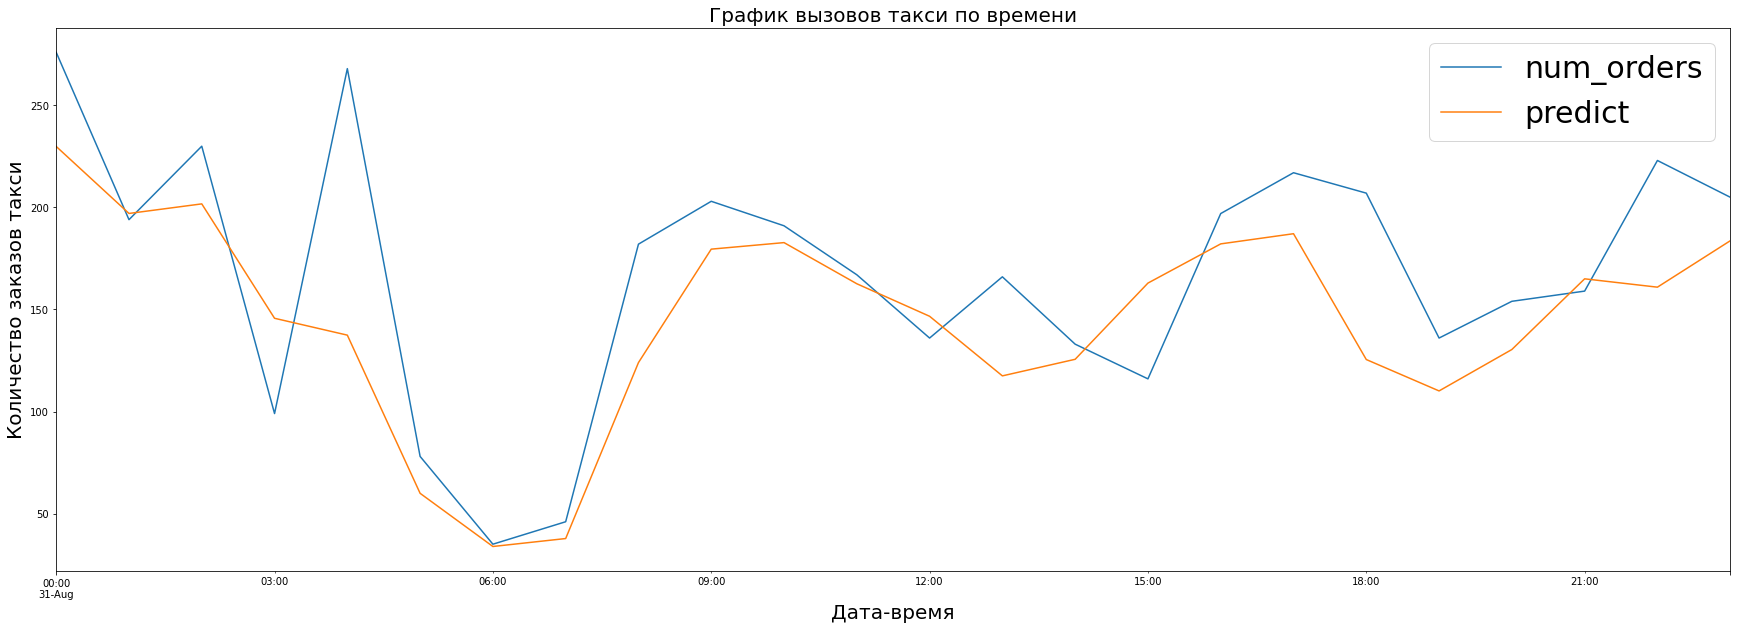

In [23]:
model = LinearRegression()
data = make_features(df,100,100)
data = data.dropna(axis=0)
train, test = train_test_split(data, shuffle=False, test_size=0.1)
x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']
model.fit(x_train, y_train)
predict = model.predict(x_test)
rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE на тестовой выборке ={:.02f}'.format(rmse))

fig = pd.DataFrame(index=y_test.index, data=y_test)
fig['predict'] = predict
fig.tail(24).plot(figsize=(30,10))
plt.legend(loc=1, prop={'size': 30})
plt.title('График вызовов такси по времени', fontsize=20)
plt.xlabel('Дата-время', fontsize=20)
plt.ylabel('Количество заказов такси', fontsize=20)
plt.show()

### RandomForestRegressor

RMSE на тестовой выборке =40.28


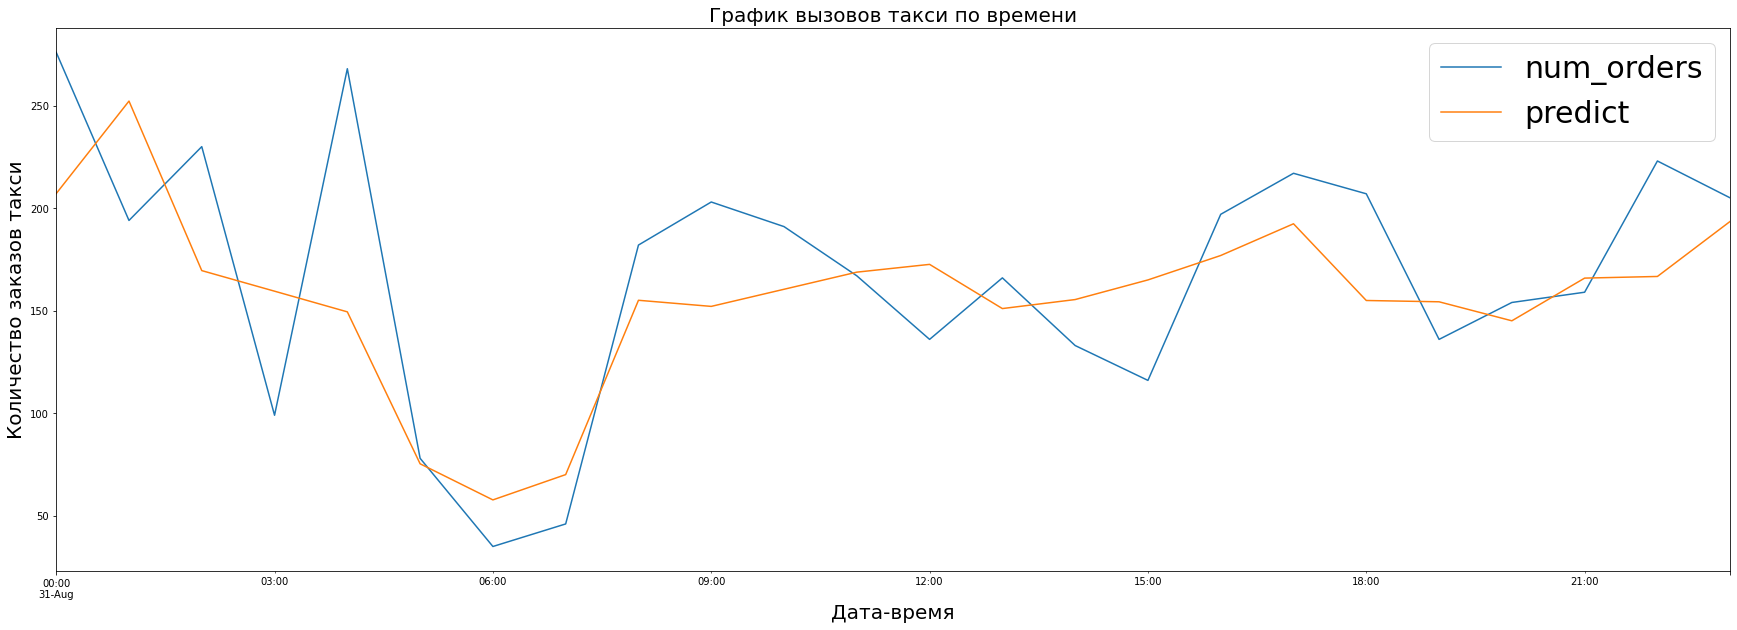

In [24]:
model = RandomForestRegressor(max_depth=25, n_estimators=250)
data = make_features(df,100,100)
# data = data.dropna(axis=0)
train, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=12345)
train = train.dropna(axis=0)
x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']
model.fit(x_train, y_train)
predict = model.predict(x_test)
rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE на тестовой выборке ={:.02f}'.format(rmse))

fig = pd.DataFrame(index=y_test.index, data=y_test)
fig['predict'] = predict
fig.tail(24).plot(figsize=(30,10))
plt.legend(loc=1, prop={'size': 30})
plt.title('График вызовов такси по времени', fontsize=20)
plt.xlabel('Дата-время', fontsize=20)
plt.ylabel('Количество заказов такси', fontsize=20)
plt.show()

### CatBoostRegressor

RMSE на тестовой выборке =46.62


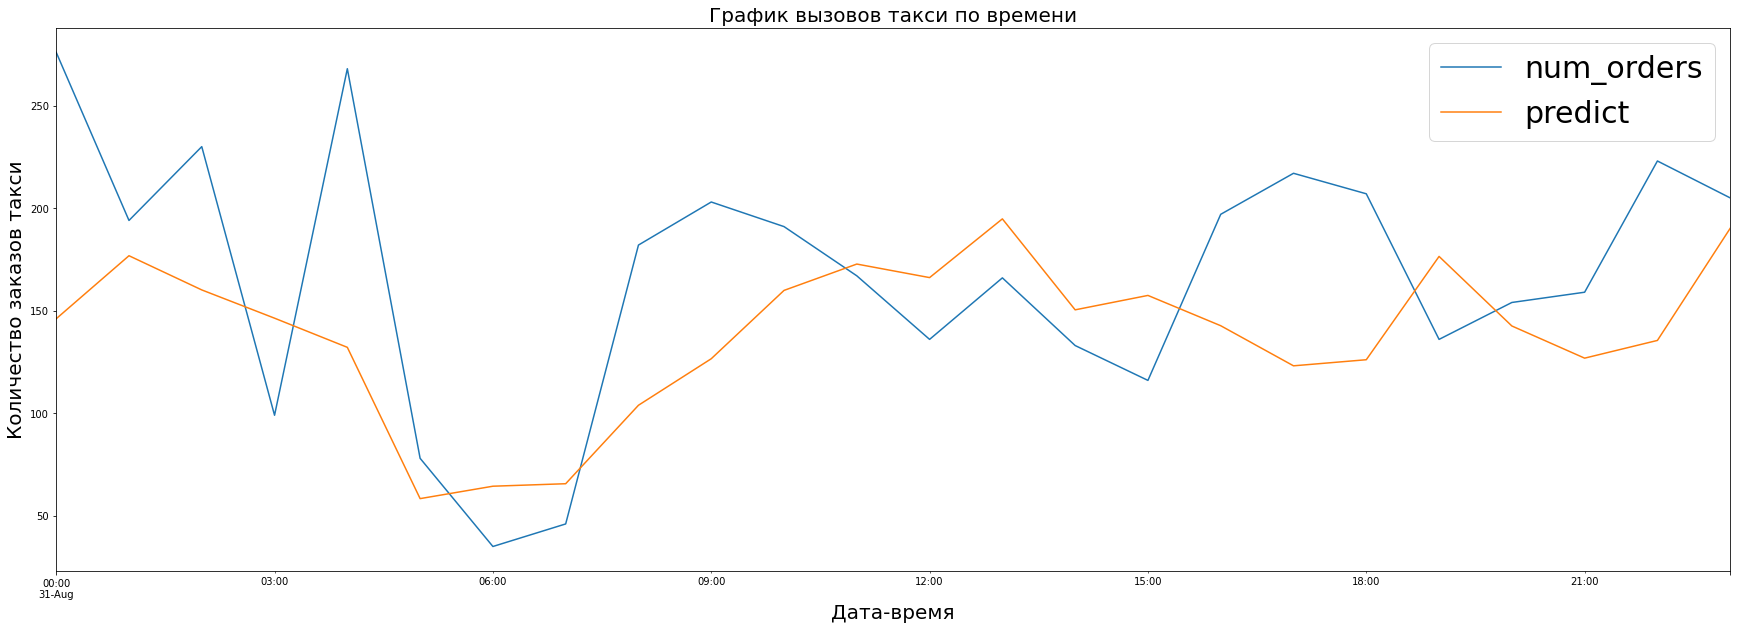

In [26]:
model = CatBoostRegressor(verbose=0,max_depth=7, n_estimators=10)
data = make_features(df,100,100)
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna(axis=0)
x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']
model.fit(x_train, y_train)
predict = model.predict(x_test)
rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE на тестовой выборке ={:.02f}'.format(rmse))

fig = pd.DataFrame(index=y_test.index, data=y_test)
fig['predict'] = predict
fig.tail(24).plot(figsize=(30,10))
plt.legend(loc=1, prop={'size': 30})
plt.title('График вызовов такси по времени', fontsize=20)
plt.xlabel('Дата-время', fontsize=20)
plt.ylabel('Количество заказов такси', fontsize=20)
plt.show()

### Проверка на адекватность

RMSE на тестовой выборке = 84.75


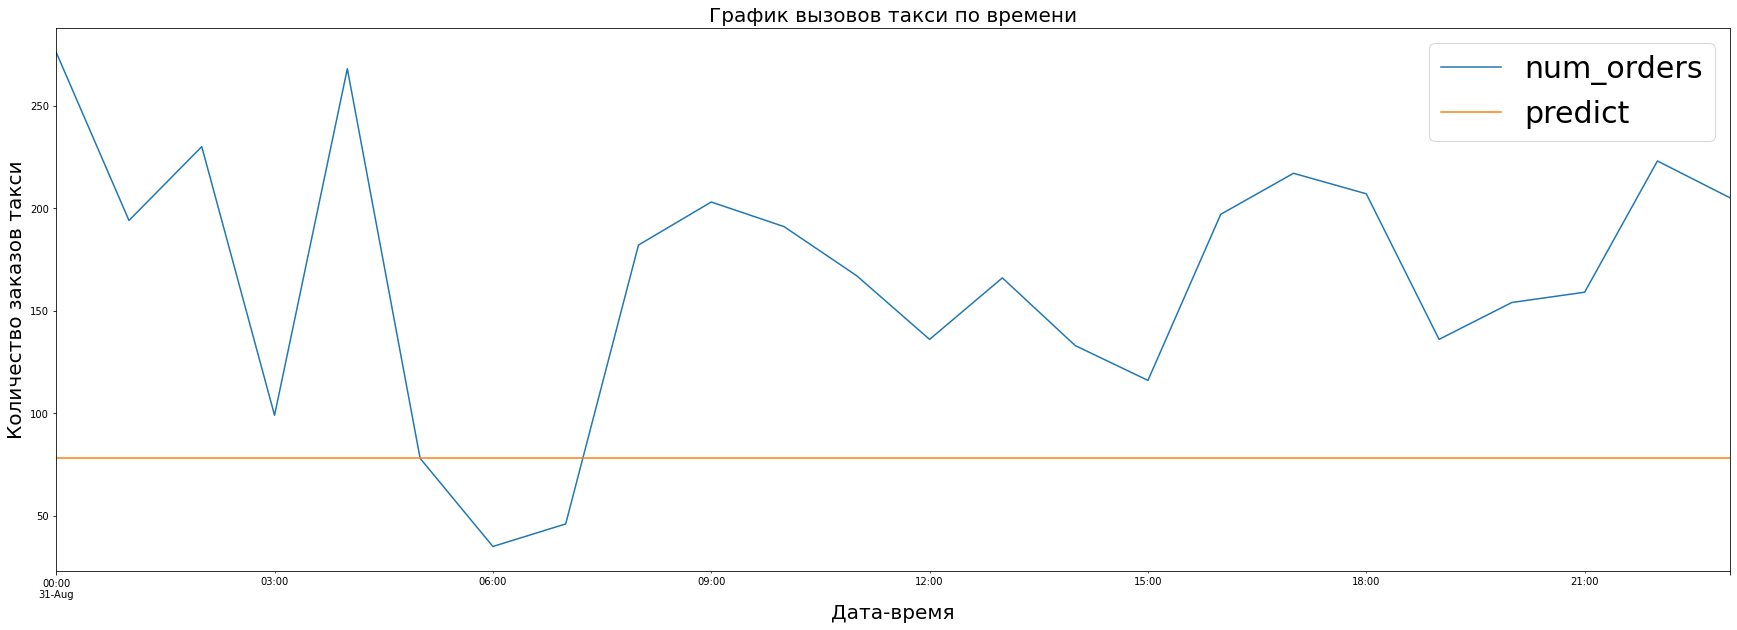

In [184]:
model = DummyRegressor(strategy='mean')
data = df.copy()
make_features(data,5,4)
data = data.dropna(axis=0)
train, test = train_test_split(data, shuffle=False, test_size=0.1)
x_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
x_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']
model.fit(x_train, y_train)
predict = model.predict(x_test)
rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE на тестовой выборке = {:.02f}'.format(rmse))

fig = pd.DataFrame(index=y_test.index, data=y_test)
fig['predict'] = predict
fig.tail(24).plot(figsize=(30,10))
plt.legend(loc=1, prop={'size': 30})
plt.title('График вызовов такси по времени', fontsize=20)
plt.xlabel('Дата-время', fontsize=20)
plt.ylabel('Количество заказов такси', fontsize=20)
plt.show()

Модель адекватна - лучше среднего (50%) предсказания в 3 раза

### Проверка на адекватность по смещению

RMSE на тестовой выборке = 58.90


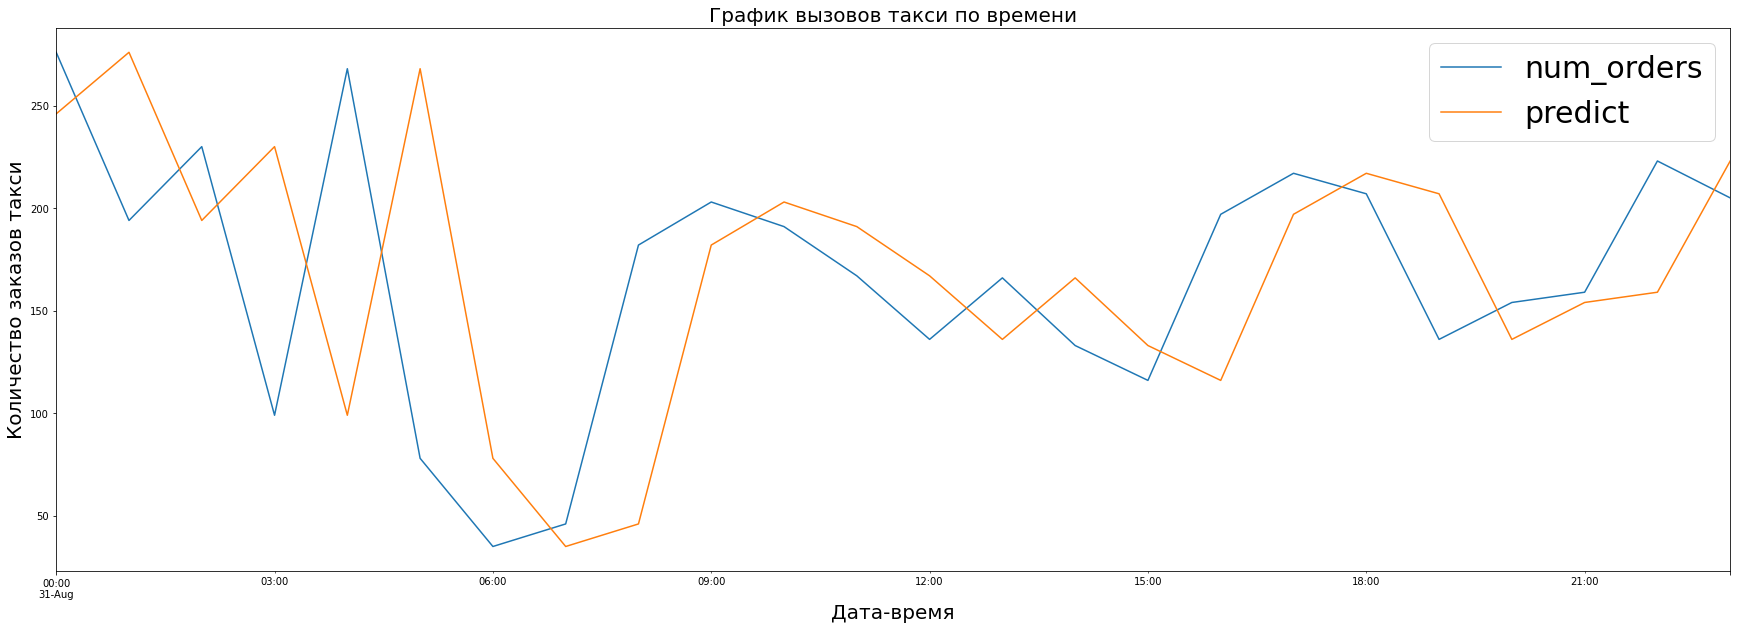

In [27]:
predict = test['num_orders'].shift()
predict.iloc[0] = y_valid.iloc[-1]

rmse = mean_squared_error(y_test, predict) ** 0.5
print('RMSE на тестовой выборке = {:.02f}'.format(rmse))

fig = pd.DataFrame(index=y_test.index, data=y_test)
fig['predict'] = predict
fig.tail(24).plot(figsize=(30,10))
plt.legend(loc=1, prop={'size': 30})
plt.title('График вызовов такси по времени', fontsize=20)
plt.xlabel('Дата-время', fontsize=20)
plt.ylabel('Количество заказов такси', fontsize=20)
plt.show()

## Выводы:

1. Модели RandomForestRegressor и LinearRegression показали лучшие результаты (при настройках по умолчанию); при этом лидирует модель RandomForestRegressor.
2. Обработка признаков при работе со временными рядами позволяет значимо улучшить результат моделей.